# Problem 3.3 Implementation of Advanced K-Means¶

In [23]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

# 1. K-Means with automatically selecting K

In [4]:
def kmean(input_df, cluster_num, seed):
    """
    This function returns n clusters from input_df.
    It has three inputs:
    1. input_df: the df of training data
    2. cluster_num: integer, the number of clusters
    3. seed: the seed for repulication
    """
    np.random.seed(seed)
    # randomly select n rows in df as initial centroids
    initial_index = np.random.choice(input_df.index, cluster_num, replace=False)
    centroids = [input_df.loc[i].values for i in initial_index]
    
    # initilize two dictionaries to store clustering information
    cluster_output = {'init':[]}
    cluster_dict = {}
    
    while cluster_output != cluster_dict: # when the new clustering 
                                          # is different from the previous one
        # store the new clustering as the old one
        cluster_output = copy.deepcopy(cluster_dict) 
        
        # initilize the new clustering
        cluster_dict = {}
        for i in range(cluster_num):
            cluster_dict[i] = []
            
        # update new clustering
        for i in range(len(input_df)):
            row = input_df.iloc[i].values
            # calculate the euclidean distance of a point to each centroid
            euclidean_distance = [np.sqrt(np.sum((row - centroids[j]) ** 2)) 
                                  for j in range(cluster_num)]
            
            # mark the point as the cluster of its nearest centroid
            index_nearest_centroid = euclidean_distance.index(np.min(euclidean_distance))
            cluster_dict[index_nearest_centroid].append(i)
        
        # update centroids    
        for k in cluster_dict:
            vectors = input_df.iloc[cluster_dict[k]].values
            centroids[k] = np.mean(vectors,axis=0)

    return cluster_output, centroids

In [55]:
def kmean_auto(input_df, k, threshold, seed):
    """
    This function returns the clustering based on K-means Algorithm. It will automatically 
    select suitable number of clusters, K.
    It has four inputs: 
    1. input_df: training df
    2. ks: integer, the largest number of possible k
    3. threshold: threshold for selecting k based the difference of accumulated distances
    4. seed: integer, set the seed for repulication
    """
    
    # initilize a very large distance
    distance = 1000*input_df.shape[0] * input_df.shape[1]
                                    
    # storing the calculated distance
    distance_list = []
    
    # iterate through possible n clusters
    for n in range(1, k+1):
        distance_n = 0 
        cluster_info, centroids = kmean(input_df, n, seed)
        
        # compute the sum of distance between each point to its centroid
        for key in cluster_info:
            vectors = input_df.iloc[cluster_info[key]].values
            distance_n += np.sqrt(np.sum((vectors - centroids[key])**2))
        
        # store the sum of distance of n clusters to list
        distance_list.append(distance_n)
    
    # select the number of cluster, n, when it is a turning point
    second_distance_diff = distance_list[0] - distance_list[1]
    for i in range(1, k-1):
        # turning point is defined as the slop changing largely at this point
        first_distance_diff = second_distance_diff
        second_distance_diff = distance_list[i] - distance_list[i+1]
        
        if abs(first_distance_diff / second_distance_diff) > threshold:
            select_point = i+1
            cluster, centroids = kmean(input_df, select_point, seed)
            break
            
    
    return cluster, centroids, select_point, distance_list

# 2. Load Data and Train

In [2]:
data = pd.read_csv('../../data/data4.txt', delimiter=' ')

In [32]:
data.head()

,density,sugar
0,0.697,0.460
1,0.774,0.376
2,0.634,0.264
3,0.608,0.318
4,0.556,0.215


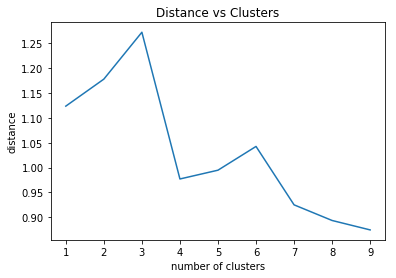

In [58]:
possible_k = 9
threshold = 6
seed = 10
cluster, centroids, select_point, distance_list = kmean_auto(data, 
                                                             possible_k, 
                                                             threshold, 
                                                             seed)

plt.plot(range(1, possible_k+1), distance_list)
plt.ylabel('distance')
plt.xlabel('number of clusters')
plt.title('Distance vs Clusters')
plt.show()